In [1]:
# Importing required libraries.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score , confusion_matrix , precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier , AdaBoostClassifier , BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
print('All imports done.')

All imports done.


In [2]:
# Reading the dataset into pandas dataframe
data = pd.read_csv("C:/Users/HP/Downloads/ML/DataSets/creditcardfraud_ds.csv")  
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Get the info related to data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Time in this case is an unnecessary factor
data.drop(['Time'] , axis= 1 , inplace= True) 
data.shape 

(284807, 30)

In [5]:
# removing the duplicates from the data
data.drop_duplicates(keep= 'first' , inplace= True)
data.shape

(275663, 30)

In [6]:
# checking whether there are any empty cells in data
data.isnull().values.any()

False

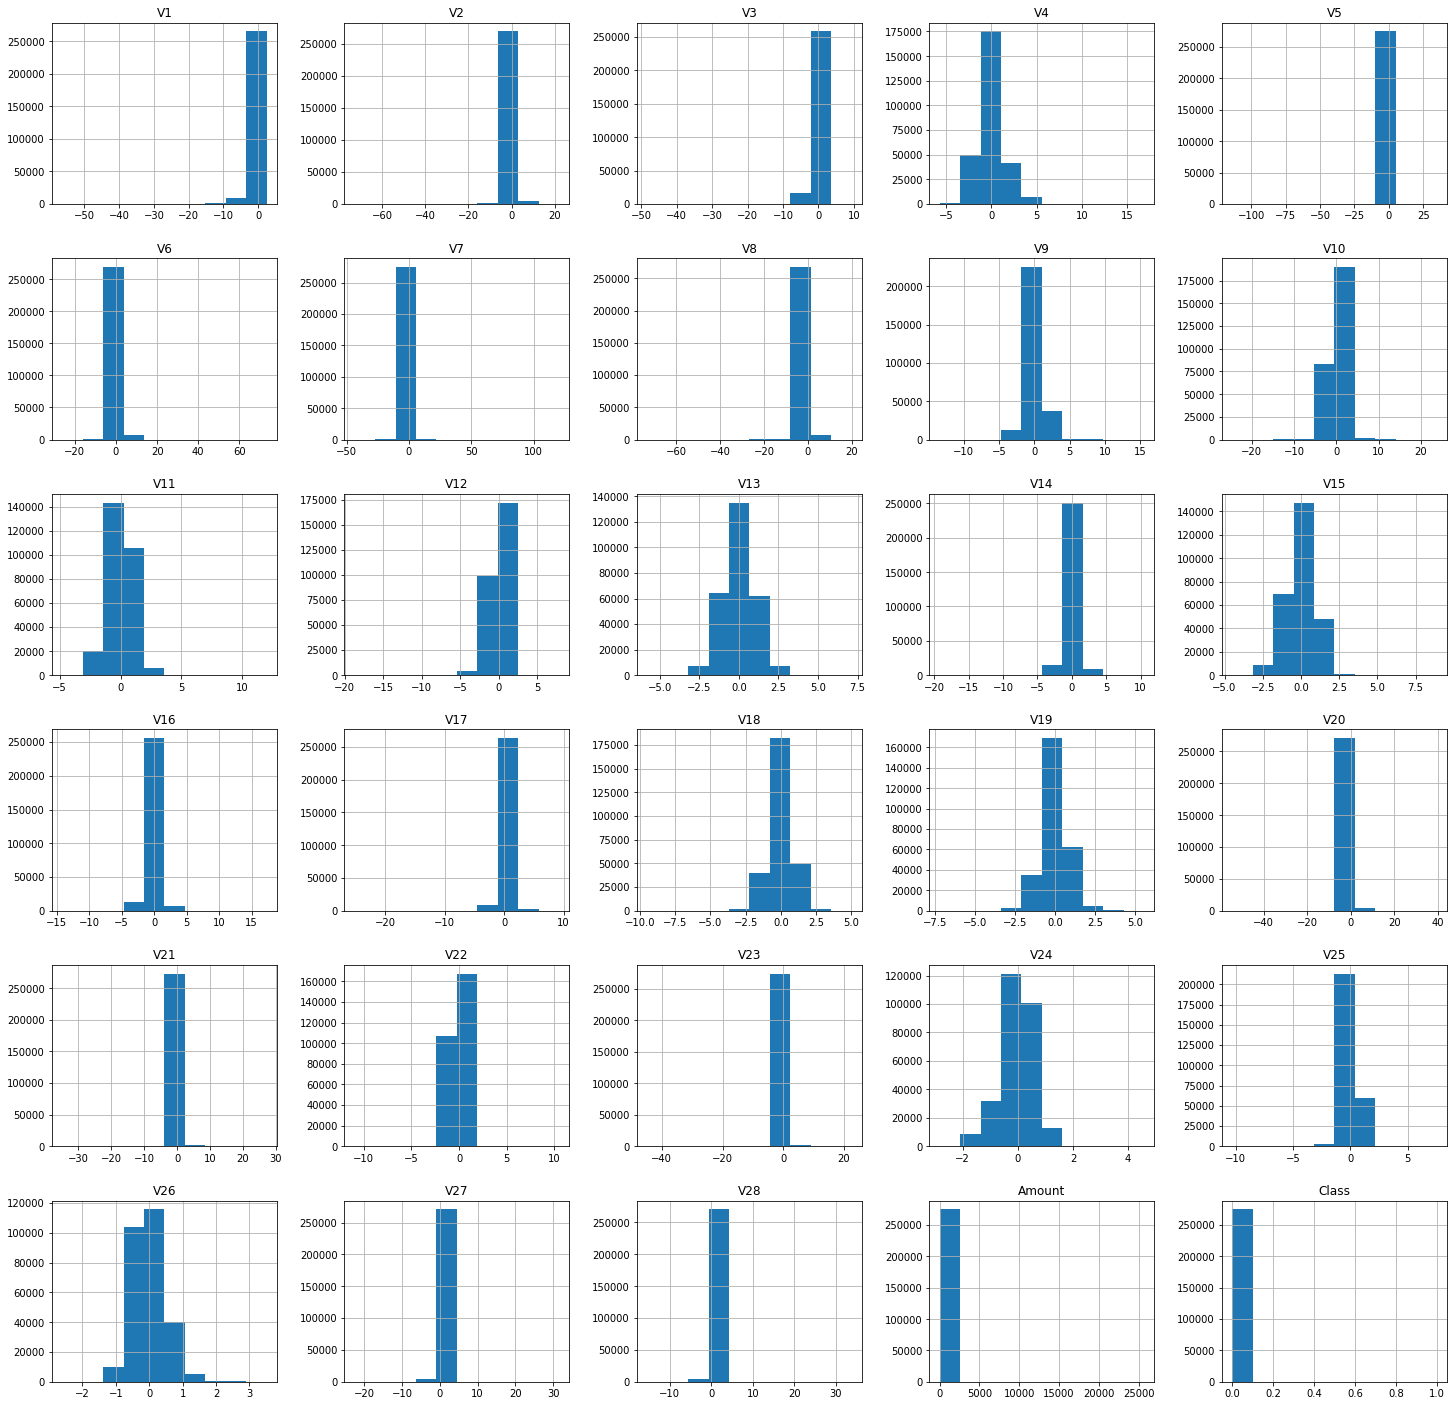

In [7]:
# plots the histograms of the each feature.
data.hist(figsize= (25,25))
plt.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

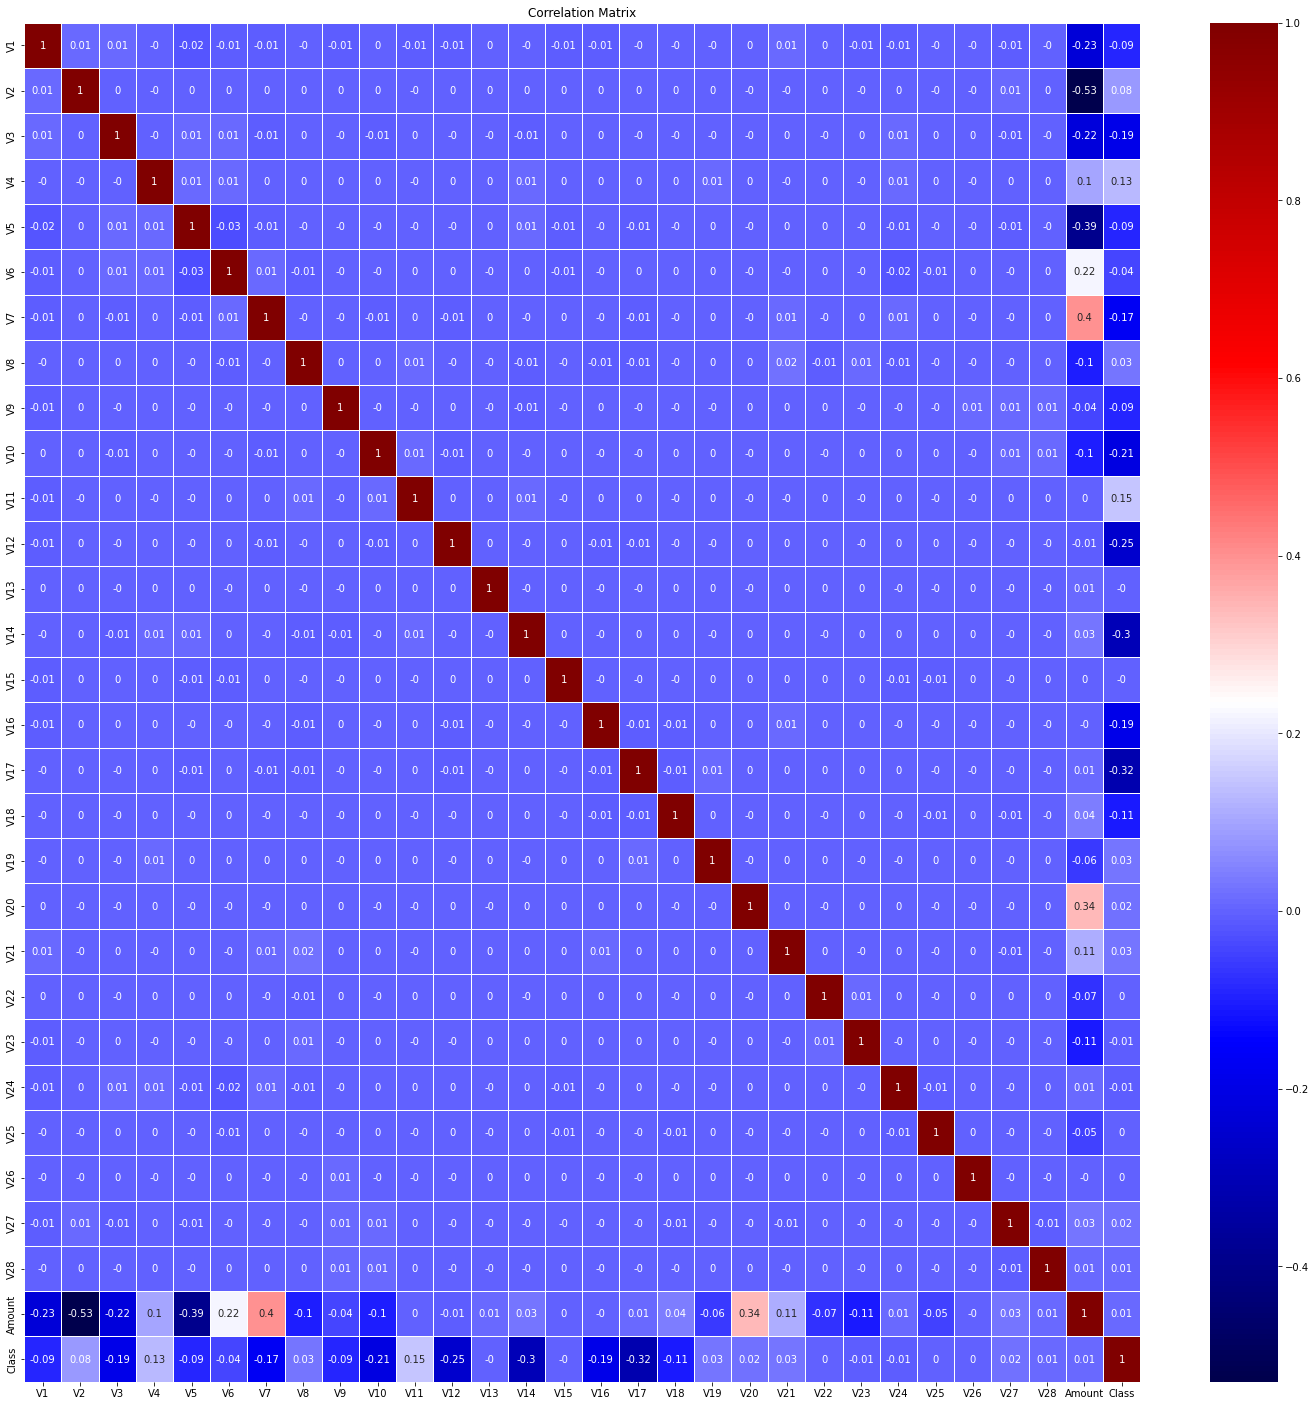

In [8]:
# Correlation Matrix
fig = plt.figure(figsize=(25,25))
plt.title('Correlation Matrix')
sns.heatmap(data.corr().round(2) , linewidths= .5 , annot= True , cmap= plt.get_cmap('seismic'))

Text(0, 0.5, 'Frequency (Number of transactions)')

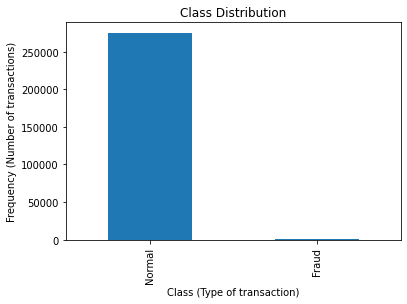

In [9]:
# plotting a bar graph showing normal transactions and fraud transactions.
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind= 'bar')
plt.xticks(range(2),['Normal','Fraud'])
plt.title('Class Distribution')
plt.xlabel('Class (Type of transaction)') 
plt.ylabel('Frequency (Number of transactions)')

From the above bar graph , We can conclude that dataset is highly imbalanced.

In [10]:
# Finding the number of normal transactions and fraud transactions in the dataset.
normal = data[data['Class'] == 0] 
fraud = data[data['Class'] == 1]
outlier_fraction = fraud.shape[0] / normal.shape[0]

print('Number of normal transactions are :' , normal.shape[0])
print('Number of fraud transactions are :' , fraud.shape[0])
print('Total number of transactions are :' , data.shape[0])
print('Outlier Fraction :' , outlier_fraction)

Number of normal transactions are : 275190
Number of fraud transactions are : 473
Total number of transactions are : 275663
Outlier Fraction : 0.001718812456847996


In [11]:
# Exporting the cleaned dataset to use in neural network implementation code.
# data.to_csv('ccf_cleaned_data.csv' , index= False)

In [12]:
# Splitting the dataset into X (input) and Y(output) . 
# Input containing data of all columns except column Class.
# Output contains data from column Class , which predicts transaction is fraud or not.
X = data.drop('Class',axis= 1)
Y = data['Class']

X = StandardScaler().fit_transform(X)
[X.shape,Y.shape]

[(275663, 29), (275663,)]

In [13]:
# Spitting the given data into 80:20 making training set and test set.
# random_state is set so that we can control shuffing and output can be reproducible 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.8, random_state= 4) 
[[ X_train.shape , Y_train.shape ],[ X_test.shape , Y_test.shape ]]

[[(220530, 29), (220530,)], [(55133, 29), (55133,)]]

##### Next step is to train the model using train set and test it with the test set. Now , I will process the data with several anomaly detection models. The models will be judged based on the following properties :
1. Accuracy  = Number of correct predictions / Total number of predictions.    
As our data set is highly imbalanced , accuracy cannot be a perfect measure to measure the performance of the model.  

2. Precision = Number of correct predictions in a class(Normal/Fraud) / Number of predicted labels in that class.  
That implies , Precision = True Positives / (True Positives + False Positives)   

3. Recall    = Number of correct predictions in a class(Normal/Fraud) / Number of actual labels in that class.   
That implies , Recall = True Positives / (True Positives + False Negatives)     
    
   Now , we develop a Precision-Recall trade off. So we use the F1 score , which strikes a balance between Precision and Recall.   

4. F1 Score  = Harmonic mean of precision and recall.   
That implies , F1 Score = True Positives / (True Positives + 1/2(False postives + False Negatives))  

   And we have two averaging techniques , macro avg(unweighted average) and weighted avg . We prefer macro avg as our dataset is imbalanced.

# Training the model with Classification algorithms and Analysing the results.

In [14]:
classifiers = {
    'Logistic' : 
        LogisticRegression(solver= 'liblinear' , max_iter= 1000 , random_state= 4) ,
    'Random Forest' : 
        RandomForestClassifier(criterion= 'gini' , max_samples= len(X_train) ,  random_state= 4) ,
    'Extra Trees' : 
        ExtraTreesClassifier(max_samples= len(X_train) , criterion= 'gini' , bootstrap= True , random_state= 4) ,
    'AdaBoost' : 
        AdaBoostClassifier(n_estimators= 150 , random_state= 4) ,
    'Bagging' : 
        BaggingClassifier(n_estimators= 20 , max_samples= len(X_train) , random_state= 4) ,
    'Decision Trees' : 
        DecisionTreeClassifier(criterion= 'gini' , random_state= 4) ,
    'XG Boost' : 
        XGBClassifier() ,
    'Hist GB Classifier' :
        HistGradientBoostingClassifier( learning_rate= 0.02 , random_state= 4),
}

cf_matrix = dict.fromkeys(classifiers.keys())
cf_matrix_new = dict.fromkeys(classifiers.keys())

In [15]:
table = {
    'Model Name' : [] ,
    'Run Time(in secs)' : [] ,
    'Threshold' : [] ,
    'Test set Accuracy' : [] ,
    'New Accuracy' : [] ,
    'Test set Precision' : [] ,
    'New Precision' : [] ,
    'Test set Recall' : [] ,
    'New Recall' : [] ,
    'Test set F1 Score' : [] ,
    'New F1 Score' : []
}

In [16]:
def prediction_maker(Y_hat,Y_test):
    precision, recall, thresholds = precision_recall_curve(Y_test, Y_hat)
    fscore = (2 * precision * recall) / (precision + recall)
    ix = np.argmax(fscore) 

    Y_pred_new = []
    for i in range(len(Y_hat)) : 
        if Y_hat[i] < thresholds[ix] :
            Y_pred_new.append(0)
        else :  
            Y_pred_new.append(1) 

    return Y_pred_new , thresholds[ix]

In [17]:
for name , clf in classifiers.items() :
    a = time.time()
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    b = time.time()

    Y_hat = clf.predict_proba(X_test)[:,1]
    Y_pred_new , threshold = prediction_maker(Y_hat , Y_test)

    table['Model Name'].append(name)
    table['Run Time(in secs)'].append(b-a)
    table['Test set Accuracy'].append(accuracy_score(Y_test , Y_pred))
    table['Test set Precision'].append(precision_score(Y_test , Y_pred , average= 'macro'))
    table['Test set Recall'].append(recall_score(Y_test , Y_pred , average= 'macro'))
    table['Test set F1 Score'].append(f1_score(Y_test , Y_pred , average= 'macro'))
    table['Threshold'].append(threshold)
    table['New Accuracy'].append(accuracy_score(Y_test , Y_pred_new))
    table['New Precision'].append(precision_score(Y_test , Y_pred_new , average= 'macro'))
    table['New Recall'].append(recall_score(Y_test , Y_pred_new , average= 'macro'))
    table['New F1 Score'].append(f1_score(Y_test , Y_pred_new , average= 'macro'))

    cf_matrix[name] = confusion_matrix(Y_test,Y_pred) 
    cf_matrix_new[name] = confusion_matrix(Y_test,Y_pred_new) 

In [18]:
df = pd.DataFrame(table) 
df = df.sort_values('Test set F1 Score' , ascending= False , ignore_index= True)
df 

,Model Name,Run Time(in secs),Threshold,Test set Accuracy,New Accuracy,Test set Precision,New Precision,Test set Recall,New Recall,Test set F1 Score,New F1 Score
0,XG Boost,41.856663,0.357713,0.999692,0.999710,0.992910,0.993014,0.908037,0.913784,0.946464,0.949927
1,Random Forest,181.037059,0.290000,0.999619,0.999637,0.979003,0.967396,0.896524,0.913748,0.933867,0.938934
2,Extra Trees,20.185734,0.240000,0.999601,0.999655,0.985326,0.967822,0.885039,0.919495,0.929387,0.942338
3,Bagging,186.609346,0.500000,0.999565,0.999601,0.984875,0.985326,0.873545,0.885039,0.921969,0.929387
4,Hist GB Classifier,4.510998,0.672414,0.999547,0.999565,0.971238,0.978070,0.879274,0.879283,0.920269,0.922968
5,AdaBoost,157.340004,0.499424,0.999420,0.999456,0.923869,0.917502,0.884948,0.907919,0.903469,0.912654
6,Decision Trees,14.046564,1.000000,0.999293,0.999293,0.883170,0.883170,0.896361,0.896361,0.889653,0.889653
7,Logistic,1.713977,0.056961,0.999111,0.999365,0.939610,0.897573,0.752819,0.902135,0.820945,0.899841


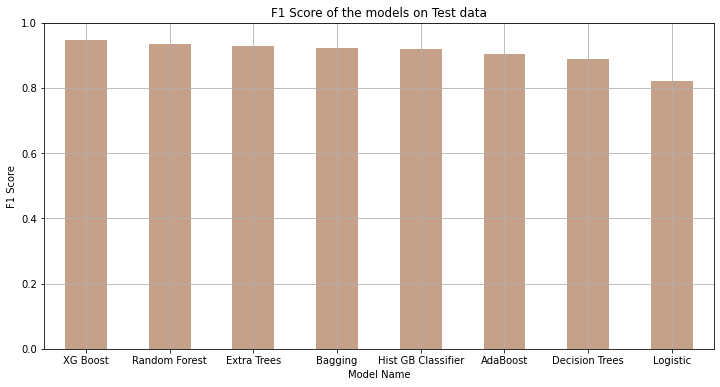

In [19]:
df.plot.bar(x="Model Name", y="Test set F1 Score", alpha=0.5, color= 'saddlebrown',
            title="F1 Score of the models on Test data", legend=False, figsize=[12,6], rot=0, grid=True, ylim=[0,1])
plt.ylabel("F1 Score")
plt.show()

Text(0.09, 0.44, 'Actual Label')

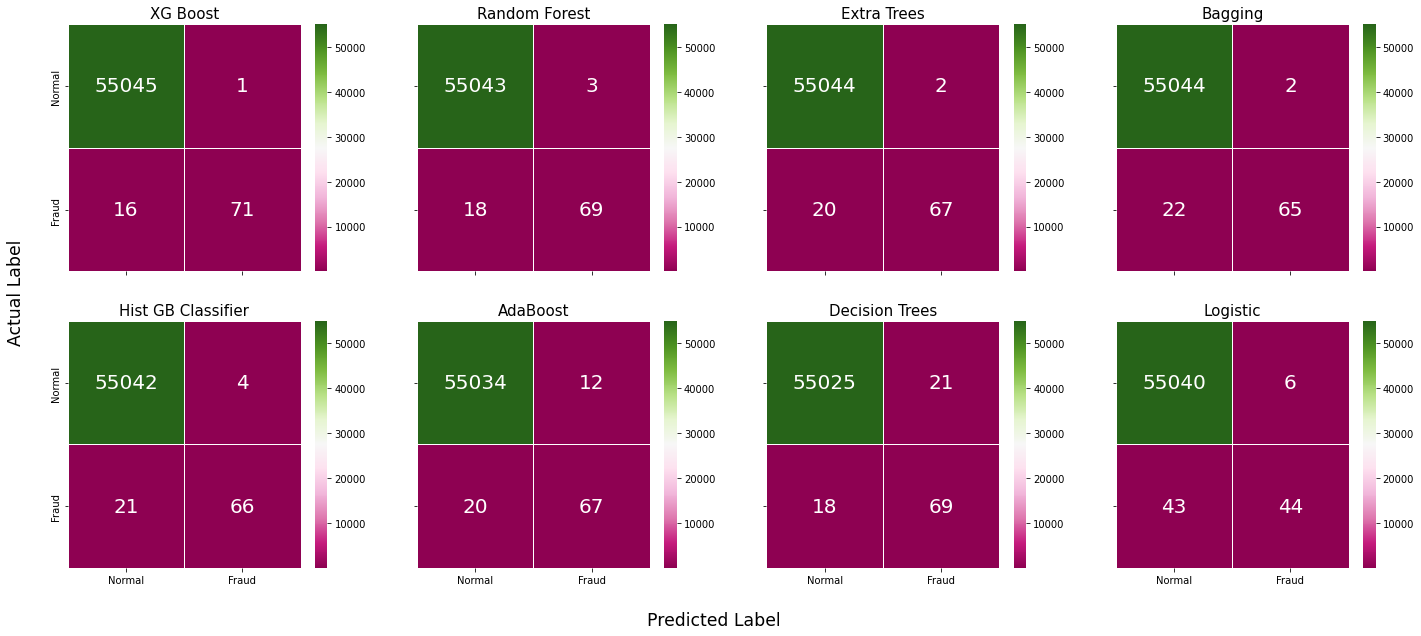

In [20]:
fig, axn = plt.subplots(2,4, sharex=True, sharey=True,figsize=(24,10))
l = ['Normal' , 'Fraud']

for i, ax in enumerate(axn.flat):
    k = list(df['Model Name'])[i]
    sns.heatmap(cf_matrix[k] , ax=ax , cmap="PiYG" , annot=True , annot_kws= {'size':20} , fmt= 'd' ,
                linewidths= .5 , xticklabels = l , yticklabels=l)
    ax.set_title(k,fontsize=15)

fig.text(0.46, 0.046 , 'Predicted Label' , fontsize= 'xx-large')
fig.text(0.09, 0.44 , 'Actual Label' , rotation= 'vertical' , fontsize= 'xx-large')

In [21]:
df = pd.DataFrame(table) 
df = df.sort_values('New F1 Score' , ascending= False , ignore_index= True)
df 

,Model Name,Run Time(in secs),Threshold,Test set Accuracy,New Accuracy,Test set Precision,New Precision,Test set Recall,New Recall,Test set F1 Score,New F1 Score
0,XG Boost,41.856663,0.357713,0.999692,0.999710,0.992910,0.993014,0.908037,0.913784,0.946464,0.949927
1,Extra Trees,20.185734,0.240000,0.999601,0.999655,0.985326,0.967822,0.885039,0.919495,0.929387,0.942338
2,Random Forest,181.037059,0.290000,0.999619,0.999637,0.979003,0.967396,0.896524,0.913748,0.933867,0.938934
3,Bagging,186.609346,0.500000,0.999565,0.999601,0.984875,0.985326,0.873545,0.885039,0.921969,0.929387
4,Hist GB Classifier,4.510998,0.672414,0.999547,0.999565,0.971238,0.978070,0.879274,0.879283,0.920269,0.922968
5,AdaBoost,157.340004,0.499424,0.999420,0.999456,0.923869,0.917502,0.884948,0.907919,0.903469,0.912654
6,Logistic,1.713977,0.056961,0.999111,0.999365,0.939610,0.897573,0.752819,0.902135,0.820945,0.899841
7,Decision Trees,14.046564,1.000000,0.999293,0.999293,0.883170,0.883170,0.896361,0.896361,0.889653,0.889653


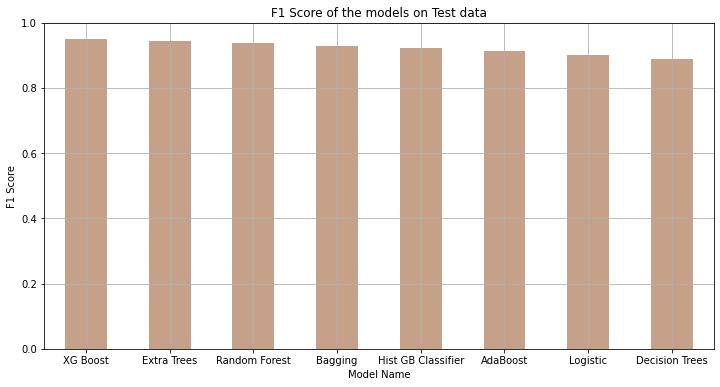

In [22]:
df.plot.bar(x="Model Name", y="New F1 Score", alpha=0.5, color= 'saddlebrown',
            title="F1 Score of the models on Test data", legend=False, figsize=[12,6], rot=0, grid=True, ylim=[0,1])
plt.ylabel("F1 Score")
plt.show()

Text(0.09, 0.44, 'Actual Label')

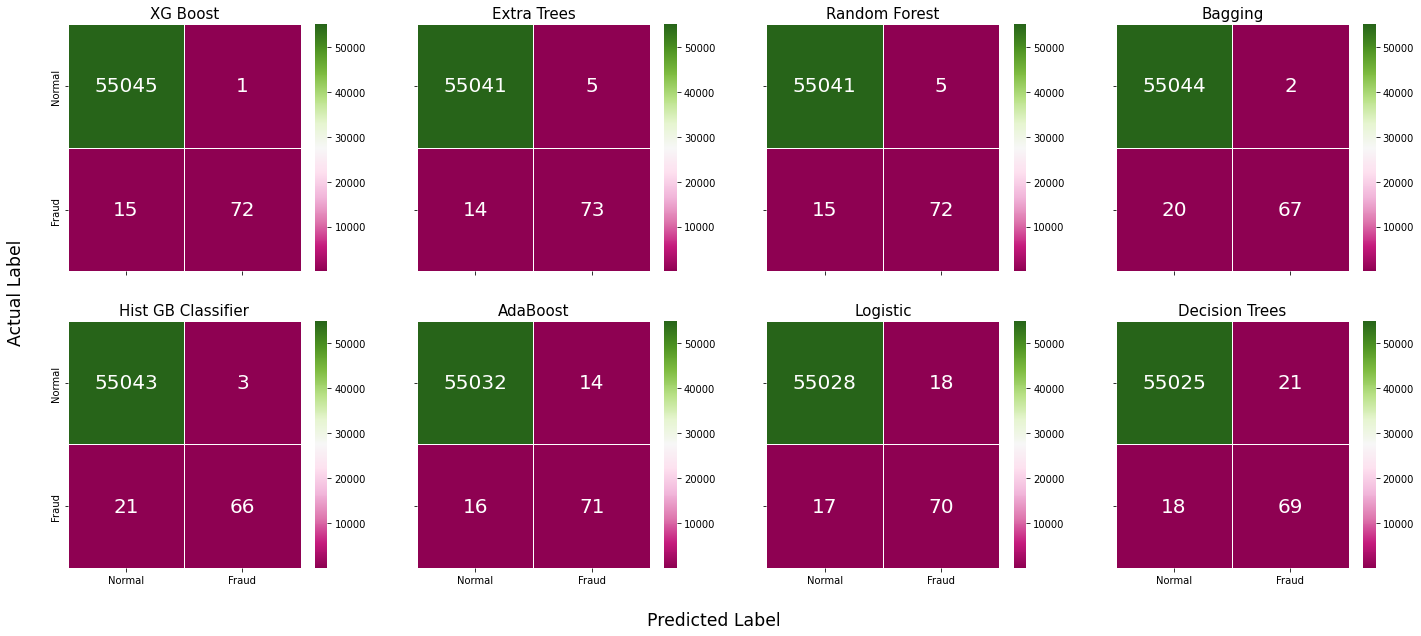

In [23]:
fig, axn = plt.subplots(2,4, sharex=True, sharey=True,figsize=(24,10))
l = ['Normal' , 'Fraud']

for i, ax in enumerate(axn.flat):
    k = list(df['Model Name'])[i]
    sns.heatmap(cf_matrix_new[k] , ax=ax , cmap="PiYG" , annot=True , annot_kws= {'size':20} , fmt= 'd' ,
                linewidths= .5 , xticklabels = l , yticklabels=l)
    ax.set_title(k,fontsize=15)

fig.text(0.46, 0.046 , 'Predicted Label' , fontsize= 'xx-large')
fig.text(0.09, 0.44 , 'Actual Label' , rotation= 'vertical' , fontsize= 'xx-large')

##### From the above visualisations we can conclude that XGBoost is the best model for credit card fraud detection . 'XGBoost' has the highest accuracy , precision and recall as well. 